# Open Exploration

In [1]:
from model.pyrice import PyRICE
from model.enumerations import *
from exploration import *
import os

from ema_workbench import (Model, RealParameter, IntegerParameter, MultiprocessingEvaluator, ema_logging)
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench.util.utilities import save_results

## Directory

In [2]:
parent_directory = os.path.dirname(os.getcwd())
target_directory = parent_directory + '/exploration/results/'

## Parameters

In [3]:
# Instantiate the model
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(model_specification=model_specification,
               damage_function=damage_function,
               welfare_function=welfare_function)

model = Model('RICE', function=model)

# Specify uncertainties
model.uncertainties = [IntegerParameter('t2xco2_index', 0, 999),
                       IntegerParameter('t2xco2_dist', 0, 2),
                       RealParameter('fosslim', 4000, 13649),
                       IntegerParameter('scenario_pop_gdp', 0, 5),
                       IntegerParameter('scenario_sigma', 0, 2),
                       IntegerParameter('scenario_cback', 0, 1),
                       IntegerParameter('scenario_elasticity_of_damages', 0, 2),
                       IntegerParameter('scenario_limmiu', 0, 1)]

# Set levers, one for each time step
model.levers = [RealParameter('sr', 0.1, 0.5),
                RealParameter('miu', 2065, 2300),
                RealParameter('irstp_consumption', 0.001, 0.015)
                ]
# Define relevant outcome variables (time series)
outcome_names = [
    'Distance to consumption threshold',
    'Distance to damage threshold',
    'Population under consumption threshold',
    'Population under damage threshold',
    'Utility',
    'Disutility'
]
model.outcomes = prepare_info_outcomes(outcome_names)

## Run Experiments

In [4]:
with MultiprocessingEvaluator(model, n_processes=50) as evaluator:
    results = evaluator.perform_experiments(scenarios=10, policies=10)
    save_results(results=results, file_name=target_directory + 'test_results')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 10 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to /Users/reddel/PycharmProjects/PyRICE/exploration/results/test_results
[MainProcess/INFO] terminating pool


## Looking at Results

In [5]:
experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)

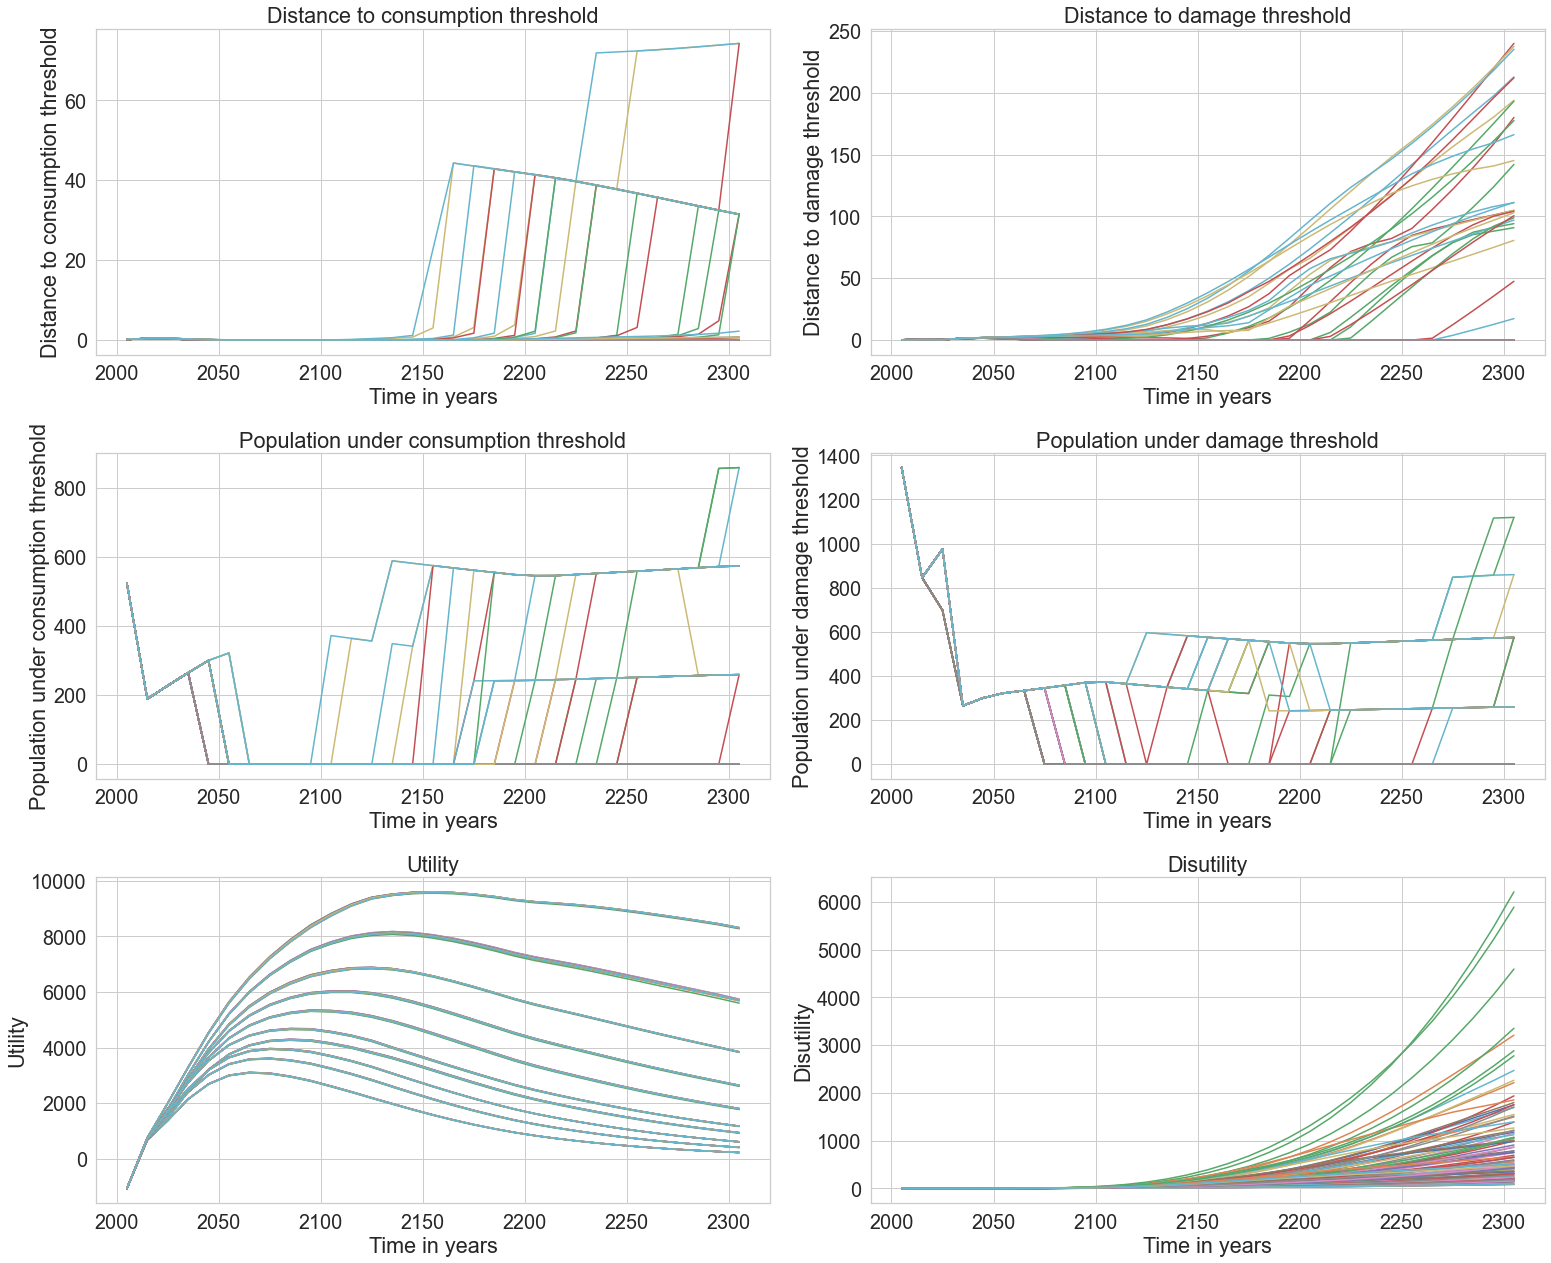

In [6]:
plot_pathways(outcomes, outcome_names)